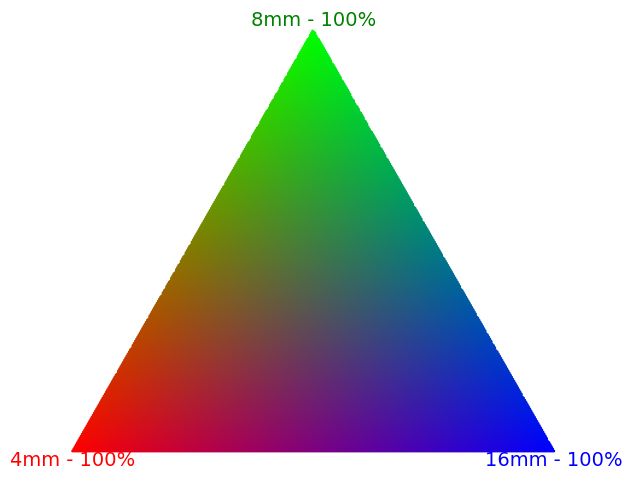

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# Define triangle vertices (scaled for visualization)
R = np.array([0, 0])        # Red vertex
B = np.array([16, 0])       # Blue vertex
G = np.array([8, 14])        # Green vertex

vertices = np.array([R, G, B])

# Triangle patch
triangle = Polygon(vertices, closed=True, edgecolor='black')

# Create a grid of points within bounding box of the triangle
min_x, max_x = np.min(vertices[:, 0]), np.max(vertices[:, 0])
min_y, max_y = np.min(vertices[:, 1]), np.max(vertices[:, 1])

x = np.linspace(min_x, max_x, 400)
y = np.linspace(min_y, max_y, 400)
xx, yy = np.meshgrid(x, y)
points = np.vstack((xx.flatten(), yy.flatten())).T

def barycentric_coords(p, a, b, c):
    """Calculate barycentric coordinates of point p with respect to triangle (a,b,c)."""
    v0, v1, v2 = b - a, c - a, p - a
    d00, d01, d11 = np.dot(v0, v0), np.dot(v0, v1), np.dot(v1, v1)
    d20, d21 = np.dot(v2, v0), np.dot(v2, v1)
    denom = d00 * d11 - d01 * d01
    v = (d11 * d20 - d01 * d21) / denom
    w = (d00 * d21 - d01 * d20) / denom
    u = 1 - v - w
    return u, v, w

# Filter points inside the triangle and compute RGB color for each
colors = []
filtered_points = []

for p in points:
    u, v, w = barycentric_coords(p, R, G, B)
    if 0 <= u <= 1 and 0 <= v <= 1 and 0 <= w <= 1:
        color = u * np.array([1, 0, 0]) + v * np.array([0, 1, 0]) + w * np.array([0, 0, 1])
        colors.append(color)
        filtered_points.append(p)

filtered_points = np.array(filtered_points)
colors = np.array(colors)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(filtered_points[:, 0], filtered_points[:, 1], color=colors, s=1)

# Label vertices
ax.text(*R, '4mm - 100%', color='red', fontsize=14, ha='center', va='top')
ax.text(*G, '8mm - 100%', color='green', fontsize=14, ha='center', va='bottom')
ax.text(*B, '16mm - 100%', color='blue', fontsize=14, ha='center', va='top')

ax.set_aspect('equal')
ax.axis('off')
plt.show()